In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(font_scale=1.25)
np.random.seed(5)

pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",100)

import pandas_profiling as pp

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, plot_roc_curve

In [2]:
df = pd.read_csv("train1processed.csv")

In [3]:
df.head()

,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,years,status,complaint_type
0,-0.035769,-0.178391,-0.107343,-0.155831,-0.060676,-0.063602,-0.26814,-0.350762,-0.277625,-0.703051,-0.230482,-0.679021,-0.209456,-0.570024,-0.144644,0,1
1,-0.032331,-0.121989,-0.048668,-0.112729,-0.060676,0.129165,-0.26814,0.377829,-0.090554,0.248113,0.339640,0.982978,-0.209456,0.057523,0.116633,0,1
2,-0.030222,-0.181321,-0.107343,-0.146578,-0.060676,-0.063602,-0.26814,0.013533,-0.216975,-0.329379,-0.696082,-0.679021,-0.209456,-0.570024,0.290817,1,1
3,-0.032331,-0.165209,-0.107343,-0.145085,-0.060676,-0.063602,-0.26814,-0.350762,-0.090554,-0.533200,-0.344506,-0.679021,-0.209456,-0.570024,-0.209963,1,0
4,-0.034206,-0.150058,-0.107343,-0.107715,-0.060676,-0.063602,-0.26814,0.377829,-0.090554,-0.023648,0.140098,-0.863687,-0.209456,-1.197571,-0.667198,1,1


### Split data for training

In [4]:
X = df.iloc[:,0:16]
y = df.iloc[:,16]

In [5]:
X.shape, y.shape

((12763, 16), (12763,))

In [6]:
X.head()

,lotarea,bldgarea,comarea,resarea,officearea,retailarea,numbldgs,numfloors,lotdepth,bldgdepth,builtfar,residfar,commfar,facilfar,years,status
0,-0.035769,-0.178391,-0.107343,-0.155831,-0.060676,-0.063602,-0.26814,-0.350762,-0.277625,-0.703051,-0.230482,-0.679021,-0.209456,-0.570024,-0.144644,0
1,-0.032331,-0.121989,-0.048668,-0.112729,-0.060676,0.129165,-0.26814,0.377829,-0.090554,0.248113,0.339640,0.982978,-0.209456,0.057523,0.116633,0
2,-0.030222,-0.181321,-0.107343,-0.146578,-0.060676,-0.063602,-0.26814,0.013533,-0.216975,-0.329379,-0.696082,-0.679021,-0.209456,-0.570024,0.290817,1
3,-0.032331,-0.165209,-0.107343,-0.145085,-0.060676,-0.063602,-0.26814,-0.350762,-0.090554,-0.533200,-0.344506,-0.679021,-0.209456,-0.570024,-0.209963,1
4,-0.034206,-0.150058,-0.107343,-0.107715,-0.060676,-0.063602,-0.26814,0.377829,-0.090554,-0.023648,0.140098,-0.863687,-0.209456,-1.197571,-0.667198,1


In [7]:
y.head()

0    1
1    1
2    1
3    0
4    1
Name: complaint_type, dtype: int64

In [8]:
X.values, y.values

(array([[-0.03576934, -0.17839125, -0.10734276, ..., -0.57002413,
         -0.14464429,  0.        ],
        [-0.03233052, -0.12198872, -0.04866845, ...,  0.05752312,
          0.11663255,  0.        ],
        [-0.03022222, -0.18132063, -0.10734276, ..., -0.57002413,
          0.29081711,  1.        ],
        ...,
        [-0.01562996,  0.46259021, -0.10734276, ...,  1.18710816,
          0.4432286 ,  0.        ],
        [-0.03532715, -0.16023871, -0.10734276, ...,  1.18710816,
         -1.05911323,  0.        ],
        [-0.03523634, -0.16801837, -0.10734276, ..., -0.57002413,
         -0.36237499,  0.        ]]),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [10]:
X_train.shape, X_test.shape

((10210, 16), (2553, 16))

### Model 1: KNN Classifier

In [11]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [12]:
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [13]:
ypred = neigh.predict(X_test)

In [14]:
ypred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [15]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.54      0.53      0.54      1253
           1       0.56      0.57      0.56      1300

    accuracy                           0.55      2553
   macro avg       0.55      0.55      0.55      2553
weighted avg       0.55      0.55      0.55      2553



In [16]:
cm = confusion_matrix(y_test,ypred)
cm

array([[669, 584],
       [559, 741]], dtype=int64)

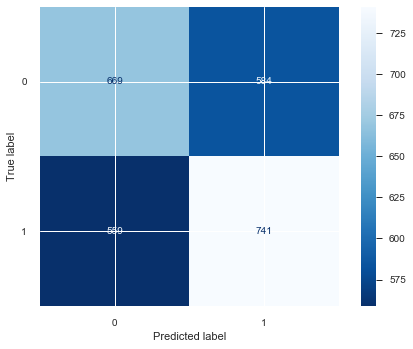

In [17]:
plot_confusion_matrix(neigh,X_test,y_test,values_format='.3g',cmap="Blues_r")
plt.show()

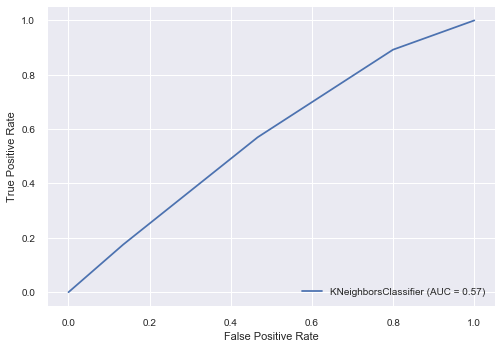

In [18]:
plot_roc_curve(neigh,X_test,y_test)
plt.show()

### Use Random Forest

In [19]:
rf = RandomForestClassifier()

In [20]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
ypred = rf.predict(X_test)

In [22]:
ypred

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [23]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53      1253
           1       0.57      0.65      0.61      1300

    accuracy                           0.57      2553
   macro avg       0.57      0.57      0.57      2553
weighted avg       0.57      0.57      0.57      2553



In [24]:
cm = confusion_matrix(y_test,ypred)
cm

array([[608, 645],
       [453, 847]], dtype=int64)

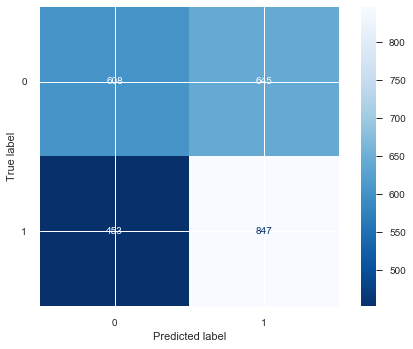

In [25]:
plot_confusion_matrix(rf,X_test,y_test,values_format='.3g',cmap="Blues_r")
plt.show()

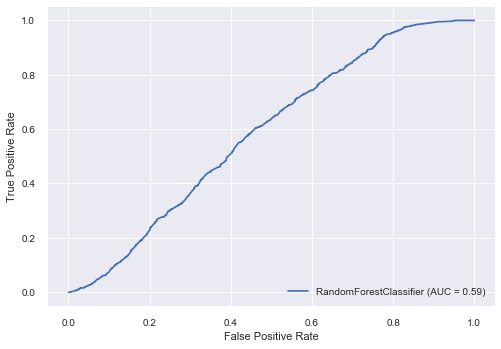

In [26]:
plot_roc_curve(rf,X_test,y_test)
plt.show()

### Use Gradient Boosting

In [27]:
gb = GradientBoostingClassifier()

In [28]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [29]:
ypred = gb.predict(X_test)

In [30]:
ypred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.72      0.31      0.44      1253
           1       0.57      0.88      0.69      1300

    accuracy                           0.60      2553
   macro avg       0.64      0.60      0.56      2553
weighted avg       0.64      0.60      0.57      2553



In [32]:
cm = confusion_matrix(y_test,ypred)
cm

array([[ 392,  861],
       [ 155, 1145]], dtype=int64)

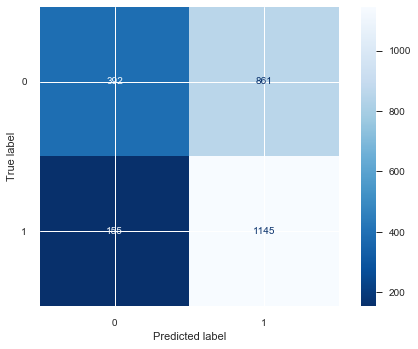

In [33]:
plot_confusion_matrix(gb,X_test,y_test,values_format='.4g',cmap="Blues_r")
plt.show()

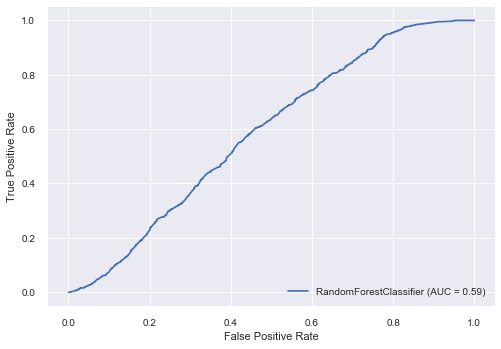

In [34]:
plot_roc_curve(rf,X_test,y_test)
plt.show()

**Use Gradient Boosting as it can detect more Heat/Hot water issues**

### Perform cross-validation

In [35]:
gbcv = cross_val_score(gb,X,y,scoring='accuracy',cv=5)

In [36]:
gbcv

array([0.62984724, 0.54014884, 0.50959655, 0.54898119, 0.64498433])

In [37]:
gbcv.mean()

0.5747116306711509

### Find Feature Importances

In [38]:
features = gb.feature_importances_
features

array([0.06624553, 0.01861322, 0.00836549, 0.04292594, 0.01169976,
       0.01345206, 0.00537153, 0.00567271, 0.04970795, 0.0122504 ,
       0.03603158, 0.006994  , 0.00525621, 0.02750208, 0.02216791,
       0.66774366])

In [39]:
featuresdf = pd.DataFrame(features, columns=["Score"])

In [40]:
featuresdf

,Score
0,0.066246
1,0.018613
2,0.008365
3,0.042926
4,0.011700
5,0.013452
6,0.005372
7,0.005673
8,0.049708
9,0.012250


In [41]:
Xcols = pd.DataFrame(X.columns,columns=['Feature Names'])

In [42]:
Xcols

,Feature Names
0,lotarea
1,bldgarea
2,comarea
3,resarea
4,officearea
5,retailarea
6,numbldgs
7,numfloors
8,lotdepth
9,bldgdepth


In [43]:
featimpt = pd.concat([Xcols,featuresdf],axis=1)

In [44]:
featimpt

,Feature Names,Score
0,lotarea,0.066246
1,bldgarea,0.018613
2,comarea,0.008365
3,resarea,0.042926
4,officearea,0.011700
5,retailarea,0.013452
6,numbldgs,0.005372
7,numfloors,0.005673
8,lotdepth,0.049708
9,bldgdepth,0.012250


In [45]:
featimpt.set_index('Feature Names')

,Score
Feature Names,
lotarea,0.066246
bldgarea,0.018613
comarea,0.008365
resarea,0.042926
officearea,0.011700
retailarea,0.013452
numbldgs,0.005372
numfloors,0.005673
lotdepth,0.049708


In [46]:
df = featimpt.set_index('Feature Names')

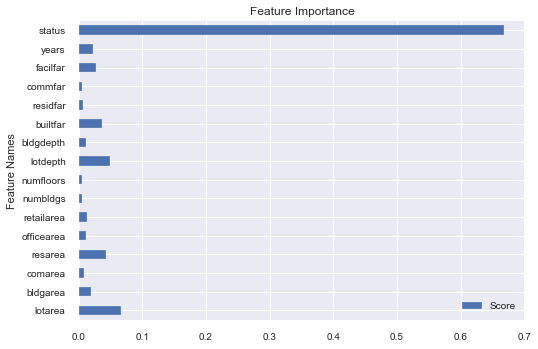

In [47]:
df.plot(kind='barh',title="Feature Importance", legend=True)
plt.show()

### Tips to improve better results
- Use more data to train (500000 to 800000 samples)
- Perform feature engineering to create new columns
- Model tuning using hyperparameter tuning
- Use more powerful algorithms like XGBoost